# Mid Term Project Submission

**Project Title**
###Exploratory Data Analysis and Classification Models

**Group Members**
- Alisha Ghaiyas
  - **Registration No:** FA21-BAI-006
- Rameen Jamshed
  - **Registration No:** FA22-BAI-034


**Submitted To**
- Sir Hafiz Syed Ahmed Qasim

**Submission Date:**
- 14th APRIL 2024

# **1. Dataset: Metaverse Financial Transactions**
## **1.1. Dataset Source:**

This dataset is taken from kaggle.

https://www.kaggle.com/datasets/faizaniftikharjanjua/metaverse-financial-transactions-dataset

This dataset provides blockchain financial transactions within the Open Metaverse, aiming to provide a rich, diverse, and realistic set of data for developing and testing anomaly detection models, fraud analysis, and predictive analytics in virtual environments. With a focus on applicability, this dataset captures various transaction types, user behaviors, and risk profiles across a global network.


## **1.2. Features:**

This dataset contains following features that were used:
1.  Timestamp:

    Date and time of the transaction.
2.  Hour of Day:

    Hour part of the transaction timestamp.
3.  Sending Address:

    Blockchain address of the sender.
4.  Receiving Address:

    Blockchain address of the receiver.
5.  Amount:

    Transaction amount in a simulated currency.
6.  Transaction Type:

    Categorization of the transaction (e.g., transfer, sale, purchase, scam, phishing).
7.  Location Region:

    Simulated geographical region of the transaction.
8.  IP Prefix:

    Simulated IP address prefix for the transaction.
9.  Login Frequency:

    Frequency of login sessions by the user, varying by age group.
10. Session Duration:

    Duration of activity sessions in minutes.
11.  Purchase Pattern:

    Behavioral pattern of purchases (e.g., focused, random, high-value).
12.  Age Group:

    Categorization of users into new, established, and veteran based on their activity history.
13.  IP Prefix:

    Simulated IP address prefix for the transaction.
14.  Risk Score:

    Calculated risk score based on transaction characteristics and user behavior.
15. Anomaly:

    Risk level assessment (e.g., high_risk, moderate_risk, low_risk).

# **2. Data Processing**

## **2.1. Importing dataset and libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#pd.set_option('max_columns', 30)

In [ ]:
df = pd.read_csv("/content/metaverse_transactions_dataset.csv")

In [ ]:
df.shape

(78600, 14)

In [ ]:
df.head(5)

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


## **2.2. Understanding our Dataset:**

---



Our dataset has the following 14 columns

In [ ]:
df.columns

Index(['timestamp', 'hour_of_day', 'sending_address', 'receiving_address',
       'amount', 'transaction_type', 'location_region', 'ip_prefix',
       'login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
       'risk_score', 'anomaly'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


This shows the datatype and count of null and non-null values in each column. here we can see that we have 78600 enteries and all of them are non-null, indiciating we don't have missing values in our dataset.

we see that the 'timestamp' column is also a String but we need to change that to Panda's datetime object.

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df.sort_values('timestamp')
df=df.reset_index()
df=df.drop('index',axis=1)
df.head()


,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-01-01 00:00:45,0,0x5e539dac6637b38aaf015861ec2da850f1ae8377,0x16c9903f99897fa292f3273513da8cf6525d0b06,592.024530,transfer,South America,10.00,6,84,high_value,veteran,49.6125,low_risk
1,2022-01-01 00:12:24,0,0xaaf2483f28bf10330253f83f9e016e1b900ad78b,0xa90b541bd2dfef162b82073318ace3fcc57340d9,755.500717,transfer,North America,172.16,3,70,focused,established,25.3125,low_risk
2,2022-01-01 00:14:54,0,0xccbf5a9926606c77db8391185066a8ee3bc0a2af,0x4f3070a2a31388c4897667752bbfac56d6426bb0,247.716361,transfer,Asia,192.00,5,54,focused,established,20.2500,low_risk
3,2022-01-01 00:27:12,0,0xffa670245089044b1e355508a7843692a25a5e52,0xc78a13e93a188c445584e724a855aeb94f972dd5,422.789709,purchase,North America,172.16,4,62,focused,established,35.4375,low_risk
4,2022-01-01 00:36:27,0,0xd92a3fafc71c2c3cde19665c9f46ec67638e33a1,0x55c98683de5bef9456cc9b82a87f0d8e942c7d6e,353.949174,sale,South America,172.16,7,94,high_value,veteran,70.8750,moderate_risk


Next we will get a bird-eye-view of our numerical data using the .describe() function.

In [ ]:
df.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


Some useful facts that we can take from this is:
 - the average amount sent/recieved : $502.574903

 - the highest transaction amount: $1557.150905

 - the average session duration: 69.684606 minutes

 - the longest session maintained: 159.000000 minutes

 - the average risk score for metaverse transactions: 44.956722

Next we will use graphics to help us understand our features better. How they span over the interval? Thier distribution?

The following plots charts for the numerical columns in our dataset.
Graphs for ip_prefix does not make any sense, so it can be ignored.

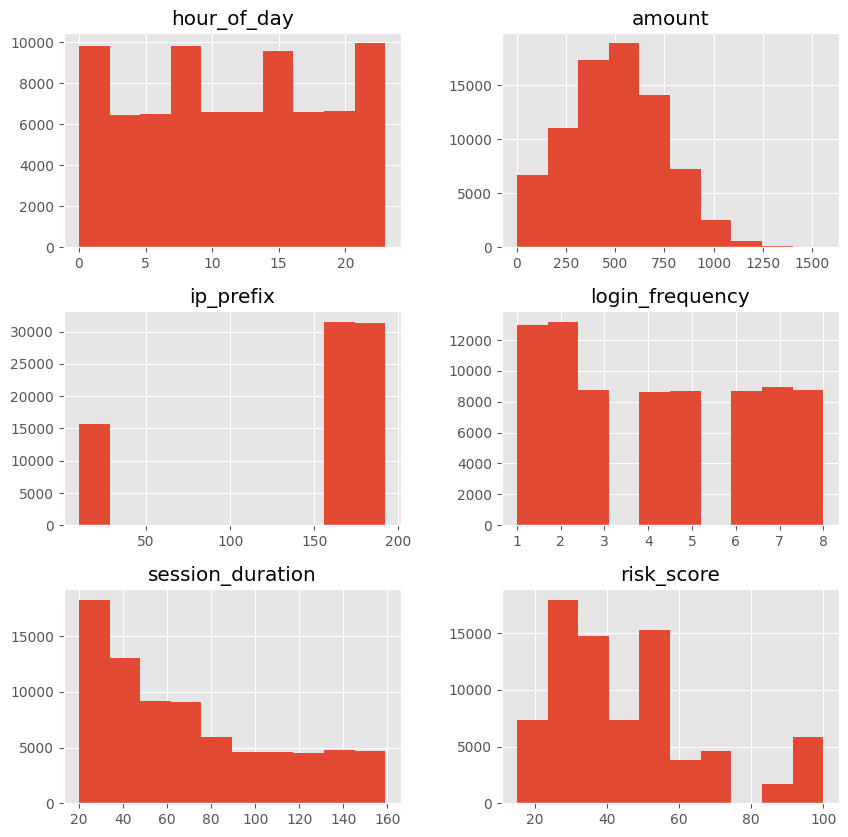

In [ ]:
df.hist(figsize=(10,10))
plt.show()

<ipython-input-96-a0bae15cfa88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-96-a0bae15cfa88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-96-a0bae15cfa88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-96-a0bae15cfa88>:5: FutureWarning: 

Passing `palette` without assigni

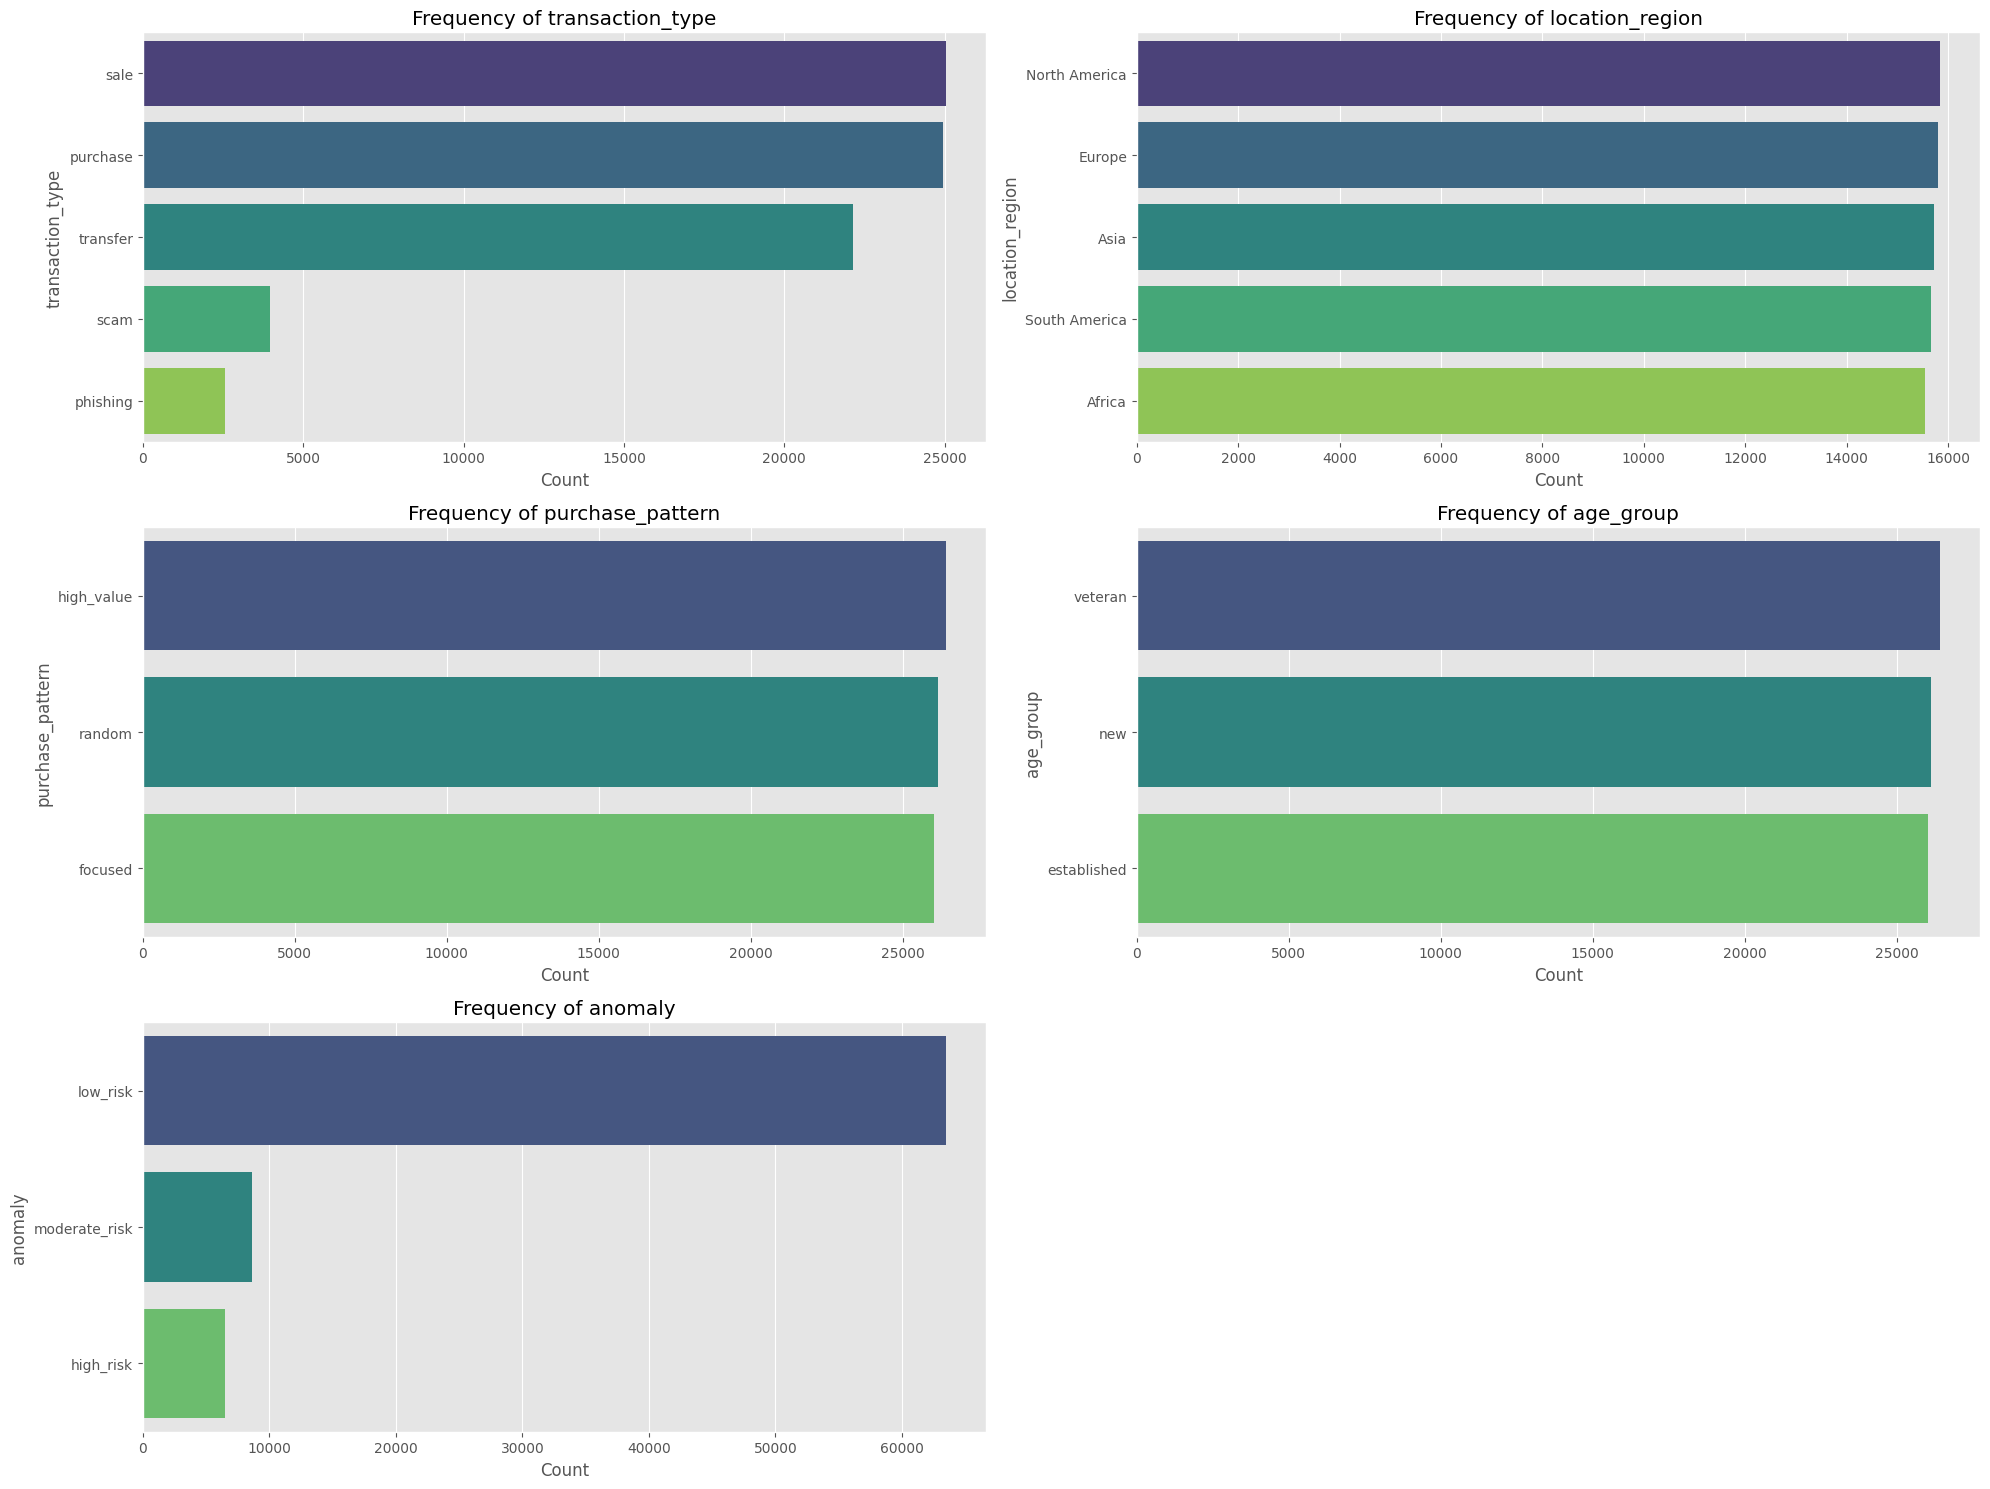

In [ ]:
cat_cols = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group', 'anomaly']
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## **2.3. Missing Data:**

We have no missing data in our dataset

In [ ]:
df.isna().sum()

timestamp           0
hour_of_day         0
amount              0
transaction_type    0
location_region     0
ip_prefix           0
login_frequency     0
session_duration    0
purchase_pattern    0
age_group           0
risk_score          0
anomaly             0
dtype: int64

## **2.4. Checking for duplicates:**

We found that we have no duplicated data.

In [ ]:
df[df.duplicated()]

,timestamp,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly


## **2.5. Feature Selection:**

We will dropout some columns that we do not need for data analysis.

Before dropping the sending address and reveiving address, it's good to know how many addresses existed on the metaverse in 2022 that were involved in some transaction.

Total number of unique sending addresses.

In [ ]:
len(df['sending_address'].unique())

1161

Total number of unique receiving addresses.

In [ ]:
len(df['receiving_address'].unique())

1166

Total number of addresses:

In [ ]:
unique_addresses = len(pd.concat([df['sending_address'], df['receiving_address']]).unique())
unique_addresses

1320

We now drop these columns since there is no information we can get from them that can be useful in our analysis.

In [ ]:
df = df.drop(['sending_address', 'receiving_address'], axis=1)
df.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-01-01 00:00:45,0,592.024530,transfer,South America,10.00,6,84,high_value,veteran,49.6125,low_risk
1,2022-01-01 00:12:24,0,755.500717,transfer,North America,172.16,3,70,focused,established,25.3125,low_risk
2,2022-01-01 00:14:54,0,247.716361,transfer,Asia,192.00,5,54,focused,established,20.2500,low_risk
3,2022-01-01 00:27:12,0,422.789709,purchase,North America,172.16,4,62,focused,established,35.4375,low_risk
4,2022-01-01 00:36:27,0,353.949174,sale,South America,172.16,7,94,high_value,veteran,70.8750,moderate_risk


# **3. Exploratory Data Analysis (EDA)**

## **3.1. Hourly Distribution of Transaction Numbers:**
Checking at which hour of the day most transactions take place.
We see that the distribution is pretty even with transactions ranging from 3150 - 3400.

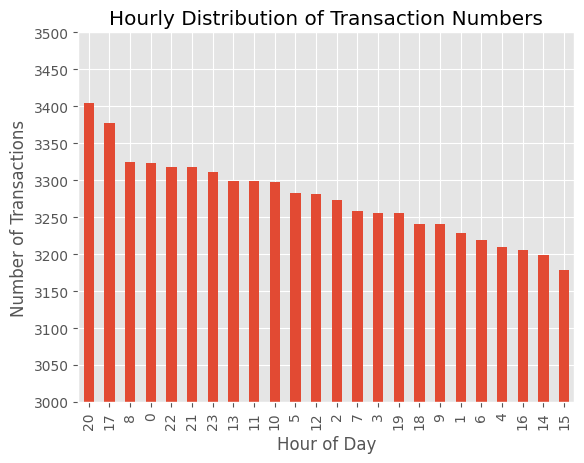

In [ ]:
ax = df['hour_of_day'].value_counts().plot(kind='bar', title = 'Hourly Distribution of Transaction Numbers')
# fit for a bar graph
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Transactions')
ax.set_ylim(3000, 3500)
ax.set_yticks(range(3000, 3501, 50))
plt.show()


 ## **3.2. Proportion of transaction types and anomaly**

 Next, we see what is the proportion of transaction types and anomaly in our data.

In [ ]:
df_pie1 = pd.DataFrame(df['transaction_type'].value_counts())
df_pie2 = pd.DataFrame(df['anomaly'].value_counts())

In [ ]:
df_pie.index

Index(['sale', 'purchase', 'transfer', 'scam', 'phishing'], dtype='object', name='transaction_type')

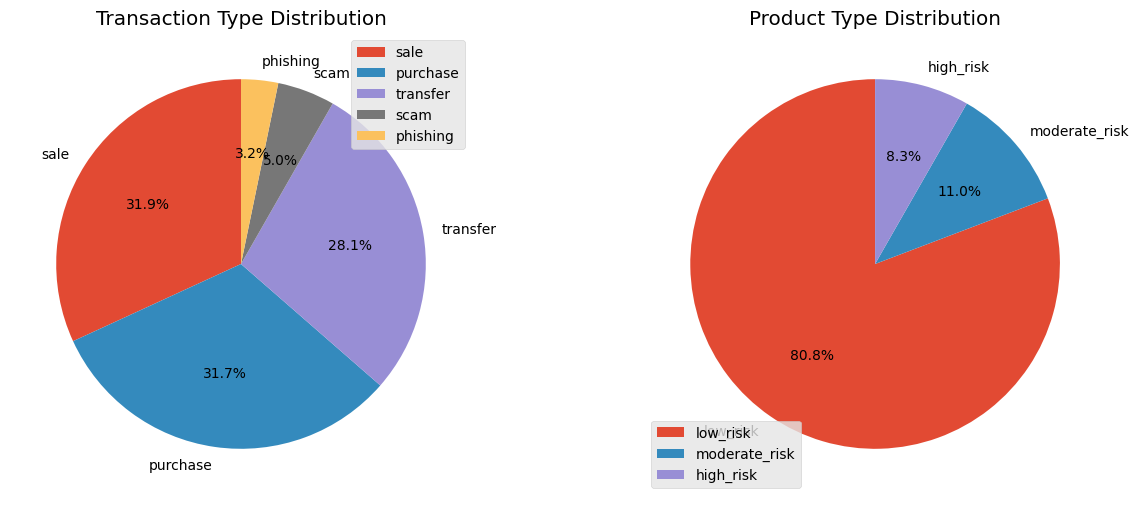

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# First pie chart
df_pie1.plot(kind='pie', y='count', labels=df_pie1.index, autopct='%1.1f%%', startangle=90, ax=ax[0])
ax[0].set_title('Transaction Type Distribution')
ax[0].set_ylabel('')  # Remove the default ylabel

# Second pie chart
df_pie2.plot(kind='pie', y='count', labels=df_pie2.index, autopct='%1.1f%%', startangle=90, ax=ax[1])
ax[1].set_title('Anomaly Distribution')
ax[1].set_ylabel('')  # Remove the default ylabel

# Display the plots
plt.show()

**Title:** Transaction Type Distribution

The pie chart illustrates the distribution of transaction types taking place in the metaverse.

**Sales and purchase:** The largest pieces of the pie are of sales and purchase indication that over 60% of the transactions are either sales or purchase.

**Transfer:** 28.1% of the transactions are transfer money.

**Phishing:** 3.2% phishing attacks.

**Scam:** 5% scams.

________________________________________
**Title:** Anomaly Distribution

The pie chart illustrates the distribution of Anomaly present in metaverse transactions.

**Low Risk:** The largest pieces of the pie indicates that 80.8% of transactions happening in the metaverse are row risk.

**Mederate Risk:** 11% are moderate risk.

**High Risk:** The smallest portion of 3.8% indicates the portion of high risk transactions.

## **3.3. Mean Risk Scores by Transaction Type**

Trying to better understand the relation between risk score and transaction type, we calculate the mean risk score for each transaction type.

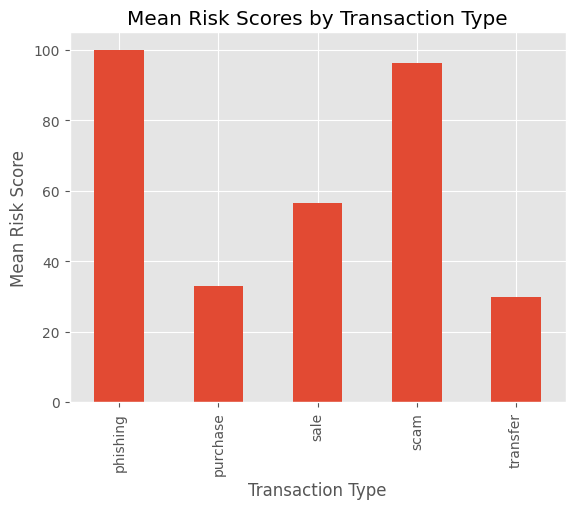

In [ ]:
ax = df.groupby('transaction_type')['risk_score'].mean().plot(kind='bar', title = "Mean Risk Scores by Transaction Type")
ax.set_ylabel("Mean Risk Score")
ax.set_xlabel("Transaction Type")
plt.show()

We see that phishing and scam have extramely high risk score and amoung 'purchase', 'sale', and 'transfer', 'sale' has the higher risk score.

## **3.3. Number of Scams and Phishing Transactions by Hour of Day:**

Next, we try to see whether scams and phishing are more likely to take place at some hours than others. We use line graphs to so show what hour how many scams and phishing attacks take place.

In [ ]:

scam_count = df[df['transaction_type'] == 'scam'].groupby('hour_of_day').size().reindex(range(24), fill_value=0)
phishing_count = df[df['transaction_type'] == 'phishing'].groupby('hour_of_day').size().reindex(range(24), fill_value=0)


scam_phishing = pd.DataFrame({
    'Hour': range(24),
    'Scam_Count': scam_count.values,
    'Phishing_Count': phishing_count.values
})

scam_phishing.head()

,Hour,Scam_Count,Phishing_Count
0,0,190,117
1,1,170,97
2,2,162,86
3,3,158,99
4,4,155,111


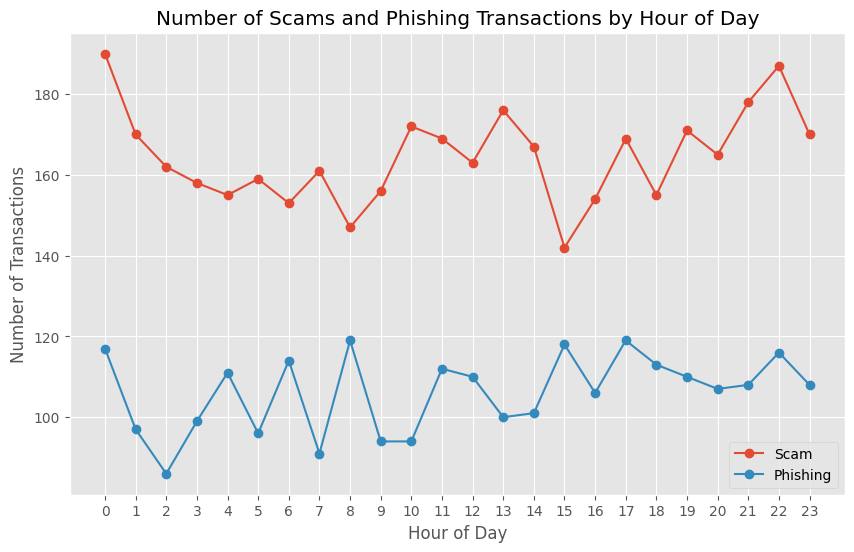

In [ ]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(scam_phishing['Hour'], scam_phishing['Scam_Count'], label='Scam',marker='o')
plt.plot(scam_phishing['Hour'], scam_phishing['Phishing_Count'], label='Phishing',marker='o')

# Setting the title and labels
plt.title('Number of Scams and Phishing Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

By the first glimps we can note that there are way more scams happening than phishing. And again there distribution is isn't alot varied throughout the day.

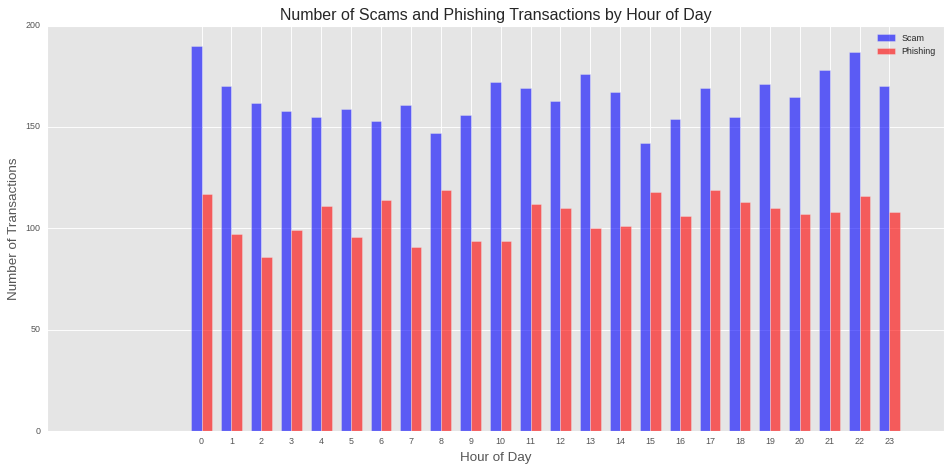

In [ ]:
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = scam_phishing['Hour']

plt.bar(index, scam_phishing['Scam_Count'], bar_width, label='Scam', color='b', alpha=0.6)
plt.bar(index + bar_width, scam_phishing['Phishing_Count'], bar_width, label='Phishing', color='r', alpha=0.6)

# Setting the title and labels
plt.title('Number of Scams and Phishing Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(index + bar_width / 2, index)

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## **3.4. Overview of relationships amoung features:**


In [ ]:
mapping = {'high_value': 0, 'focused': 1, 'random': 2}
df['purchase_pattern_encoded'] = df['purchase_pattern'].map(mapping)
df.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,purchase_pattern_encoded
0,2022-01-01 00:00:45,0,592.024530,transfer,South America,10.00,6,84,high_value,veteran,49.6125,low_risk,0
1,2022-01-01 00:12:24,0,755.500717,transfer,North America,172.16,3,70,focused,established,25.3125,low_risk,1
2,2022-01-01 00:14:54,0,247.716361,transfer,Asia,192.00,5,54,focused,established,20.2500,low_risk,1
3,2022-01-01 00:27:12,0,422.789709,purchase,North America,172.16,4,62,focused,established,35.4375,low_risk,1
4,2022-01-01 00:36:27,0,353.949174,sale,South America,172.16,7,94,high_value,veteran,70.8750,moderate_risk,0


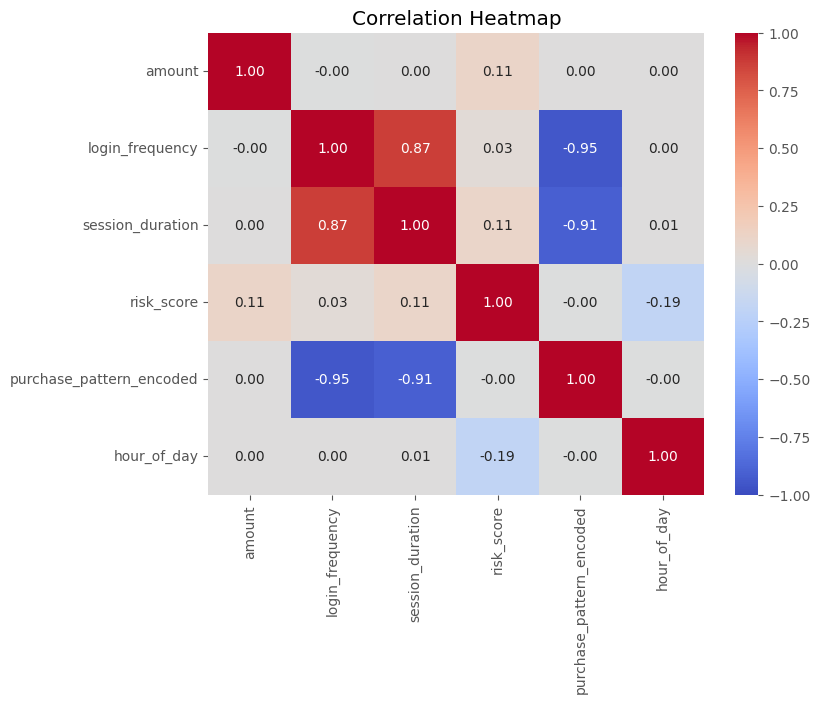

In [ ]:
corr_matrix = df[['amount','login_frequency','session_duration','risk_score','purchase_pattern_encoded','hour_of_day']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

We find that there is a strong positive relation between 'session duration' and 'login frequency'. A very strong negative relationship between 'purchase pattern' and 'login frequency'. And a strong negative relationship between 'purchase pattern' and 'session_duration'. 'Risk score' and 'amount' show a faint positive relationship as well.

We will now explore these relationships further for better understanding.

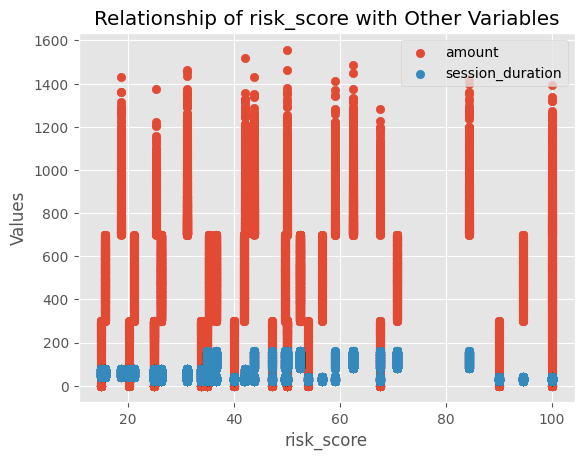

In [ ]:
for column in ['amount','session_duration']:
    if column != 'risk_score':
        plt.scatter(df['risk_score'], df[column], label=column)

plt.title('Relationship of risk_score with Other Variables')
plt.xlabel('risk_score')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

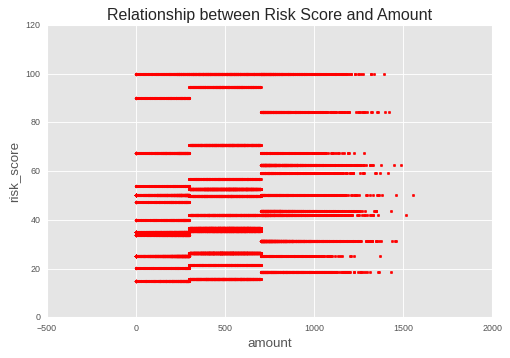

In [ ]:
plt.scatter(df['amount'], df['risk_score'],color='red', marker='o', s=5)
plt.xlabel('amount')
plt.ylabel('risk_score')
plt.title('Relationship between Risk Score and Amount')
plt.show()